In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('Data_Analyst_Job_Data.csv')
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [ ]:
data.drop([data.columns[0]], axis='columns',inplace=True)

In [ ]:
data.shape

(2253, 15)

In [ ]:
columns = data.columns
columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 264.1+ KB


In [ ]:
data.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

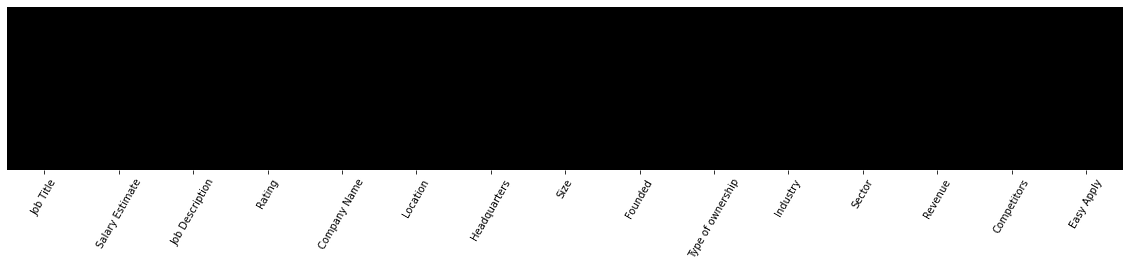

In [ ]:
plt.figure(figsize=(20,3))
sns.heatmap(data.isnull(), cmap='Greys_r', cbar=False)
plt.yticks([])
plt.xticks(rotation=60);

 One null in comapany name

# start exploring columns
1. Job Title

In [ ]:
data[columns[0]].value_counts()

Data Analyst                                                              405
Senior Data Analyst                                                        90
Junior Data Analyst                                                        30
Business Data Analyst                                                      28
Sr. Data Analyst                                                           21
                                                                         ... 
Data Analyst - III                                                          1
Upstart - Data Analyst                                                      1
Data Analyst - Senior Consultant - Norfolk, VA with Security Clearance      1
AWS Analys/ Data analyst                                                    1
Sr Business Analyst (Data Quality)                                          1
Name: Job Title, Length: 1272, dtype: int64

>> * I thought may be we can diffrentiate the data on the basis of diffrent Job Title. But it can't be helpfull as there are 1272 unique titles.

> * ## For Top 10 **Job Titles**, plot 'Job Title' vs 'Count' 

In [ ]:
df = data[columns[0]].value_counts()
df = df.to_frame().reset_index()
df.rename(columns={'index': 'Job Title', 'Job Title': 'Count'}, inplace=True)
df

,Job Title,Count
0,Data Analyst,405
1,Senior Data Analyst,90
2,Junior Data Analyst,30
3,Business Data Analyst,28
4,Sr. Data Analyst,21
...,...,...
1267,Data Analyst - III,1
1268,Upstart - Data Analyst,1
1269,"Data Analyst - Senior Consultant - Norfolk, VA...",1
1270,AWS Analys/ Data analyst,1


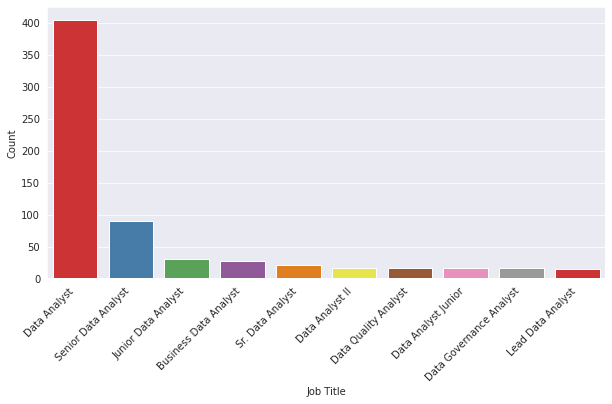

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data = df.head(10),
    x='Job Title',
    y ='Count',
    palette = 'Set1'
)
chart = chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
)
plt.show()
plt.show()

> * ## Word Cloud of Job Titles

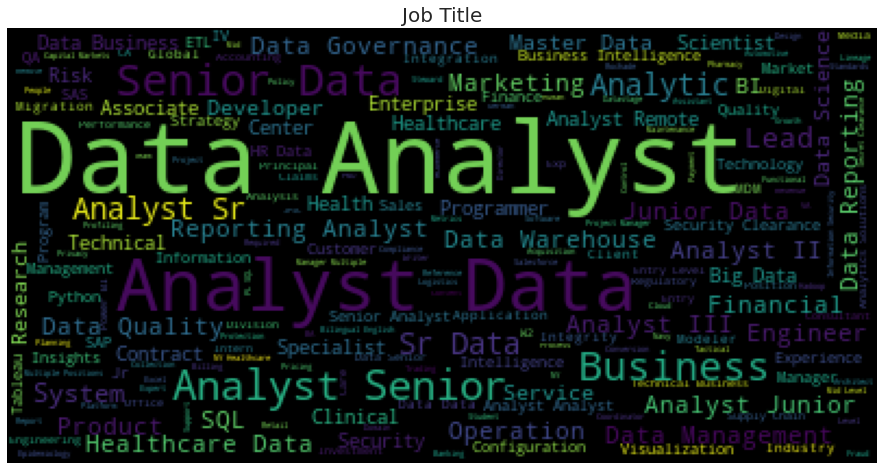

In [ ]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(data['Job Title'])
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='black', stopwords=stopwords).generate(text)
plt.figure(figsize=(20,8))
plt.title('Job Title', fontsize=20)
plt.axis('off')
plt.imshow(wc)
plt.show()

## 2. Salary

In [ ]:
data[columns[1]].value_counts()

$41K-$78K (Glassdoor est.)    57
$42K-$76K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$43K-$77K (Glassdoor est.)     3
$47K-$81K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
-1                             1
Name: Salary Estimate, Length: 90, dtype: int64

>> divide the salary column into max salarya and min salary

In [ ]:
def minsalary(salaryrange):
  import re
  temp = re.findall(r'\d+', salaryrange)
  if len(temp) == 1:
    return -1
  return temp[0]
def maxsalary(salaryrange):
  import re
  temp = re.findall(r'\d+', salaryrange)
  if len(temp) == 1:
    return -1
  return temp[1]

index = np.arange(2253)
df = pd.DataFrame(index=index)
data['min_salary'] = data[columns[1]].apply(minsalary).astype('int')
data['max_salary'] = data[columns[1]].apply(maxsalary).astype('int')
df

""
0
1
2
3
4
...
2248
2249
2250
2251


>  ## Max and Min Salary distribution.

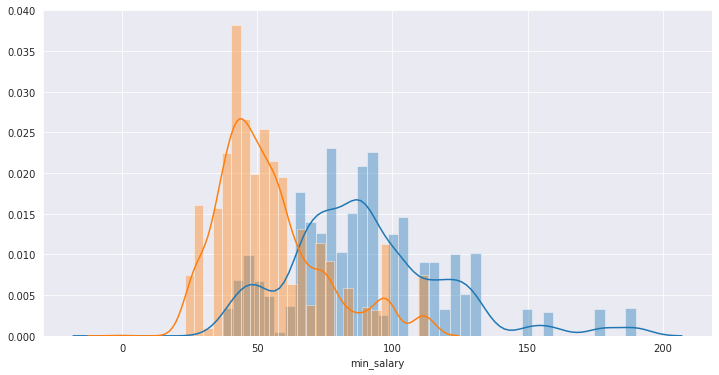

In [ ]:
plt.figure(figsize=(12,6))
ax = plt.gca()
sns.distplot(data['max_salary'], ax = ax, bins=50)
sns.distplot(data['min_salary'], ax=ax)
plt.show()

>> * Min salary distribution is a bit right skewed
>> * While Max salary distribution is normal distribution.

> ### Top 15 Job Title with average maximum salary

In [ ]:
df = data.groupby(['Job Title'])['max_salary'].mean().sort_values(ascending=False)
df = df.reset_index()
df.rename(columns={'max_salary':'average max salary'}, inplace=True)

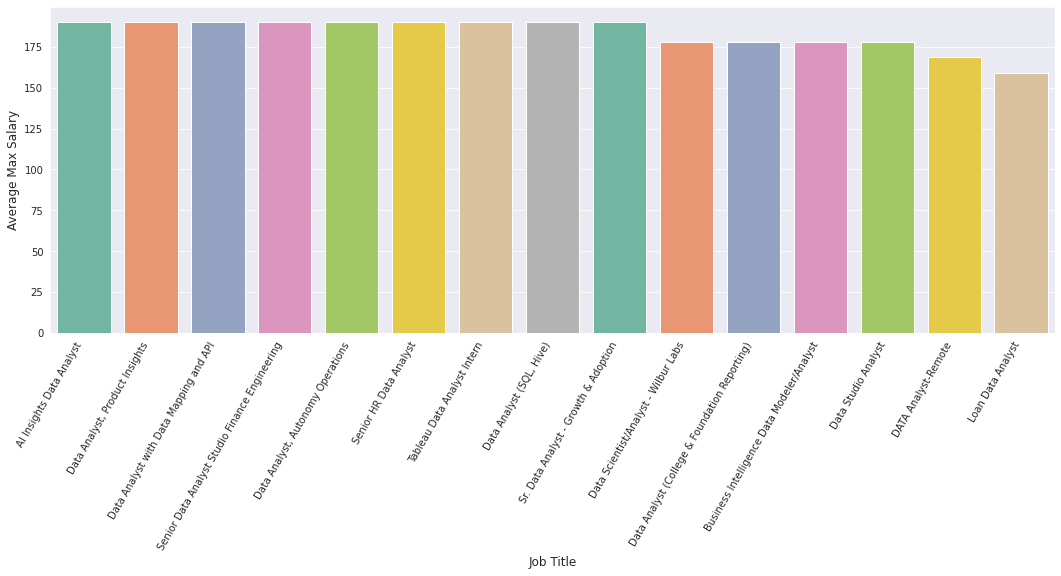

In [ ]:
plt.figure(figsize=(18,6))
chart = sns.barplot(
    data=df.head(15),
    x='Job Title',
    y='average max salary',
    palette='Set2')
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment='right',
    fontweight='light'
)
plt.xlabel('Job Title',size=12)
plt.ylabel('Average Max Salary',size=12)
plt.show()

# chart = sns.barplot(
#     data = df.head(10),
#     x='Job Title',
#     y ='Count',
#     palette = 'Set1'
# )
# chart = chart.set_xticklabels(
#     chart.get_xticklabels(), 
#     rotation = 45, 
#     horizontalalignment = 'right',
#     fontweight = 'light',
# )

>> ## Top 10 Job Title with least Average Min Salary

In [ ]:
df = data.groupby(['Job Title'])['min_salary'].mean().sort_values()
df = df.reset_index()
df.rename(columns={'min_salary':'average min salary'}, inplace=True)
#df.rename(columns={'max_salary':'average max salary'}, inplace=True)

In [ ]:
df

,Job Title,average min salary
0,Configuration/Data Management Analyst III,-1.0
1,Data Analyst - Retail (Entry Level),24.0
2,"Analyst, Data Intelligence",24.0
3,"Data Analyst (SQL, Tableau)",24.0
4,Data Science – Analyst/Associate - Security In...,24.0
...,...,...
1267,LIMS Master Data Analyst,113.0
1268,"Data Analyst - Health, Senior",113.0
1269,Senior Clinical Data Analyst,113.0
1270,19-0574 - Service Operations Data Analyst,113.0


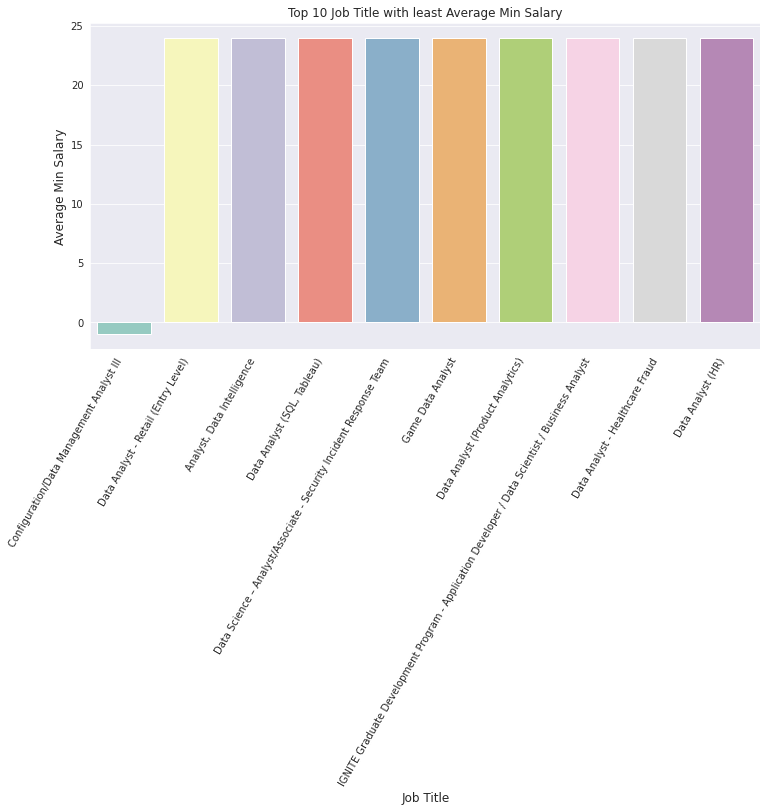

In [ ]:
plt.figure(figsize=(12,6))
chart = sns.barplot(
    data=df.head(10),
    x='Job Title',
    y='average min salary',
    palette='Set3'
)
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment = 'right',
    fontweight='light'
)
plt.xlabel('Job Title', size=12)
plt.ylabel('Average Min Salary', size=12)
plt.title('Top 10 Job Title with least Average Min Salary', size=12)
plt.show()


* we can see one value as -1. Which means ```isnull()``` ignored -1 i.e. null value in this columns.

>>> ### lets convert -1, '-1', -1.0 to Nan.

In [ ]:
data.replace('-1', np.nan, inplace=True)
data.replace(-1, np.nan, inplace=True)
data.replace(-1.0, np.nan, inplace=True);

>> ## bar plot of salary of top 10 Job Title with highest maximum salary

In [ ]:
df = data[['Job Title', 'min_salary', 'max_salary']].groupby(['Job Title']).max().sort_values(by=['max_salary'],ascending=False)

In [ ]:
df = df.reset_index()

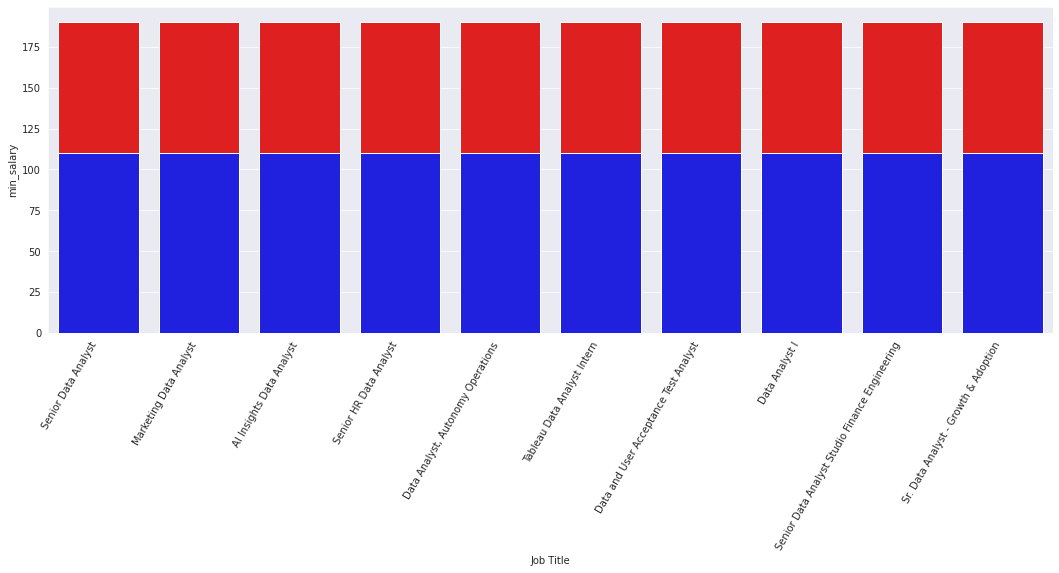

In [ ]:
# df.head(10).plot(kind='bar', stacked=True)
plt.figure(figsize=(18,6))
ax = plt.gca()
chart = sns.barplot(data=df.head(10),x='Job Title', y='max_salary', ax=ax, color='r')
sns.barplot(data=df.head(10),x='Job Title', y='min_salary', ax=ax, color='b')
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment='right',
    fontweight='light'
)
plt.show()

> ## Job Describtion

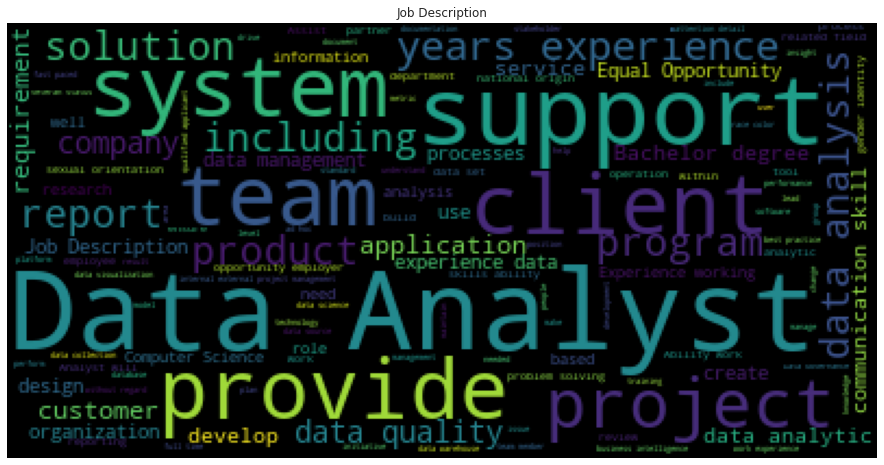

In [ ]:
text = " ".join(data['Job Description'])
stopwords=set(STOPWORDS)
wc = WordCloud(stopwords=stopwords).generate(text)

plt.figure(figsize=(16,8))
plt.title('Job Description')
plt.axis('off')
plt.imshow(wc);

In [ ]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37.0,66.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0


> ## Ratings

In [ ]:
data['Rating'].describe()

count    1981.000000
mean        3.731903
std         0.670332
min         1.000000
25%         3.300000
50%         3.700000
75%         4.100000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
df = data['Rating'].value_counts()

In [ ]:
df = df.reset_index()
df.rename(columns={'index':'Ratings', 'Rating':'Count'}, inplace=True)
df.sort_values(by=['Ratings'], ascending=False, inplace=True, axis=0)

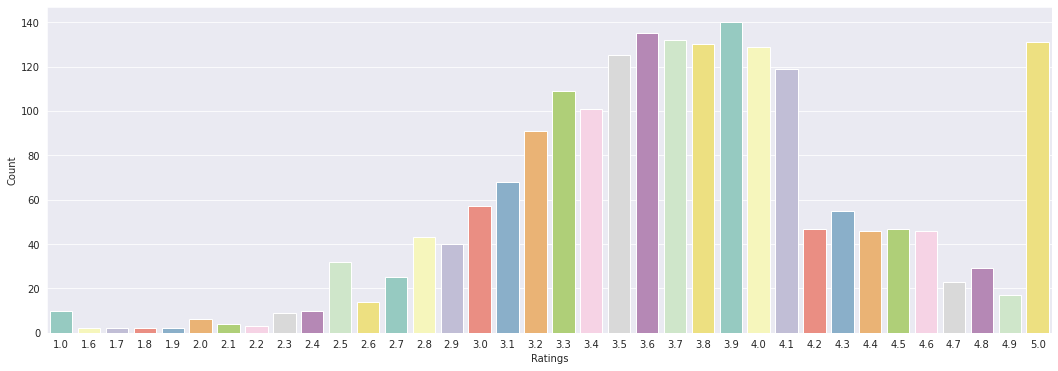

In [ ]:
plt.figure(figsize=(18,6))
chart = sns.barplot(data=df,
                    x='Ratings',
                    y='Count',
                    palette='Set3')
plt.show()

> ## Company Name

In [ ]:
data['Company Name'].head()

0             Vera Institute of Justice\n3.2
1    Visiting Nurse Service of New York\n3.8
2                           Squarespace\n3.4
3                              Celerity\n4.1
4                               FanDuel\n3.9
Name: Company Name, dtype: object

>> ### Cleaning the columns Company Name by removing Rating

In [ ]:
def propername(companyname):
  try:
    import re
    temp = re.findall(r'.*', companyname)
    return temp[0]
  
  except:
    return -1

data['Company Name'] = data[columns[4]].apply(propername)

In [ ]:
data['Company Name'].value_counts()

Staffigo Technical Services, LLC     58
Diverse Lynx                         22
Kforce                               19
Lorven Technologies Inc              19
Mondo                                14
                                     ..
Crawford Thomas Recruiting            1
University of Southern California     1
PrivateBancorp, Inc.                  1
Nokia                                 1
Huntington Ingalls Industries         1
Name: Company Name, Length: 1502, dtype: int64

> ## Location

In [ ]:
data['Location'].value_counts()

New York, NY           310
Chicago, IL            130
San Francisco, CA      119
Austin, TX              81
Los Angeles, CA         80
                      ... 
Queens Village, NY       1
Burr Ridge, IL           1
American Fork, UT        1
Yorktown, VA             1
Fort Washington, PA      1
Name: Location, Length: 253, dtype: int64

>> ### Dividing the Location into state and city

In [ ]:
data['City'] = data[columns[5]].apply(lambda x:x.split(',')[0])
data['State'] = data[columns[5]].apply(lambda x: x.split(' ')[-1])

In [ ]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,City,State
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0,New York,NY
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0,New York,NY
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37.0,66.0,New York,NY
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0,New York,NY


>> ### plotting 'State' vs 'Count' i.e. number of jobs in that state.

In [ ]:
df = data['State'].value_counts().reset_index()
df.rename(columns={'index':'State', 'State':'Count'}, inplace=True)

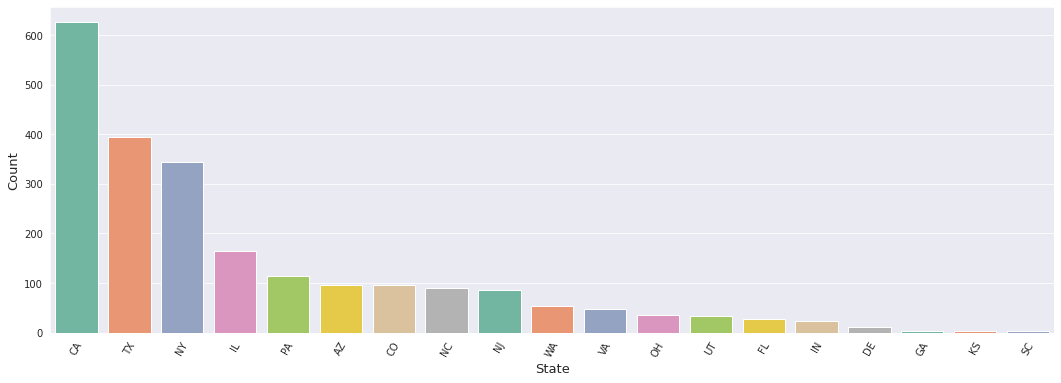

In [ ]:
plt.figure(figsize=(18,6))
chart = sns.barplot(data=df,
                    x='State',
                    y='Count',
                    palette='Set2')
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment='center',
    fontweight='light'
)
plt.xlabel('State', size=13)
plt.ylabel('Count', size=13)
plt.show()

>> ### plotting'City' vs 'Count' i.e. number of jobs in that city, for top 15 cities.

In [ ]:
df = data['City'].value_counts().sort_values(ascending=False).reset_index().head(15)
df.rename(columns={'index':'City', 'City':'Count'}, inplace=True)

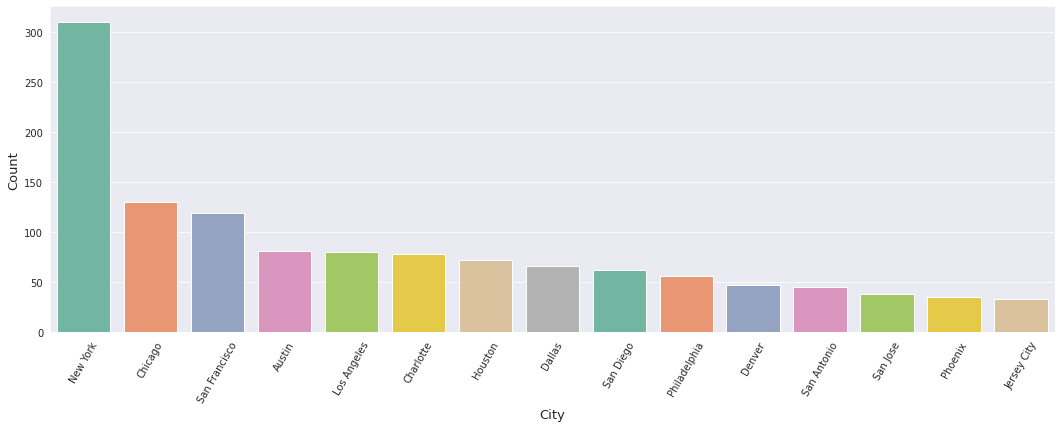

In [ ]:
plt.figure(figsize=(18,6))
chart = sns.barplot(data=df,
                    x='City',
                    y='Count',
                    palette='Set2')
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment='center',
    fontweight='light'
)
plt.xlabel('City', size=13)
plt.ylabel('Count', size=13)
plt.show()

>> ### Top 10 cities with highest average max salary

In [ ]:
df = data.groupby(['City'])['max_salary'].mean().sort_values(ascending=False).reset_index()

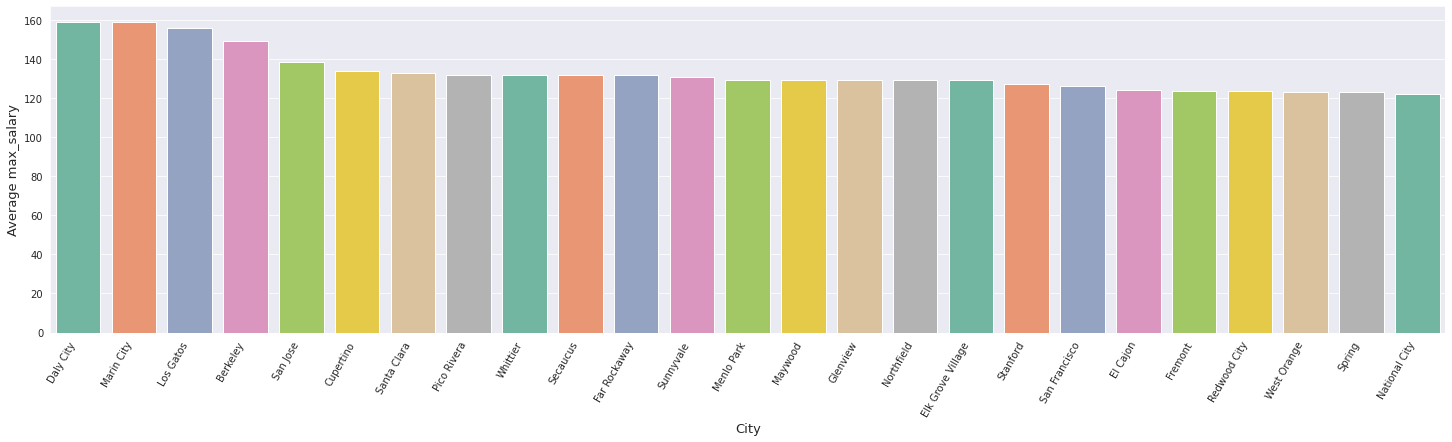

In [ ]:
def boxplot(df, x, y, n, i=16):
  plt.figure(figsize=(i,6))
  chart = sns.barplot(data=df.head(n),
                      x=x,
                      y=y,
                      palette='Set2')
  chart = chart.set_xticklabels(
      chart.get_xticklabels(),
      rotation=60,
      horizontalalignment='right',
      fontweight='light'
  )
  plt.xlabel(x, size=13)
  plt.ylabel('Average '+y, size=13)
  plt.show()

boxplot(df, 'City', 'max_salary', 25, 25)

>> ### Word Cloud of cities

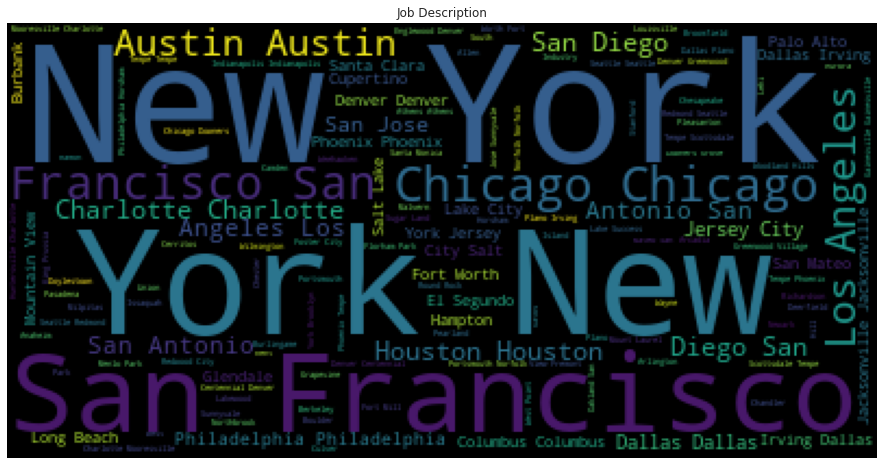

In [ ]:
text = " ".join(data['City'])
wc = WordCloud(stopwords=stopwords).generate(text)

plt.figure(figsize=(16,8))
plt.title('Job Description')
plt.axis('off')
plt.imshow(wc);

> ## Industries

In [ ]:
data['Industry'].value_counts()

IT Services                                 325
Staffing & Outsourcing                      323
Health Care Services & Hospitals            151
Consulting                                  111
Computer Hardware & Software                111
                                           ... 
Consumer Product Rental                       1
Consumer Electronics & Appliances Stores      1
News Outlet                                   1
Truck Rental & Leasing                        1
Audiovisual                                   1
Name: Industry, Length: 88, dtype: int64

>> ### Top 15 Industries with average maximun salary

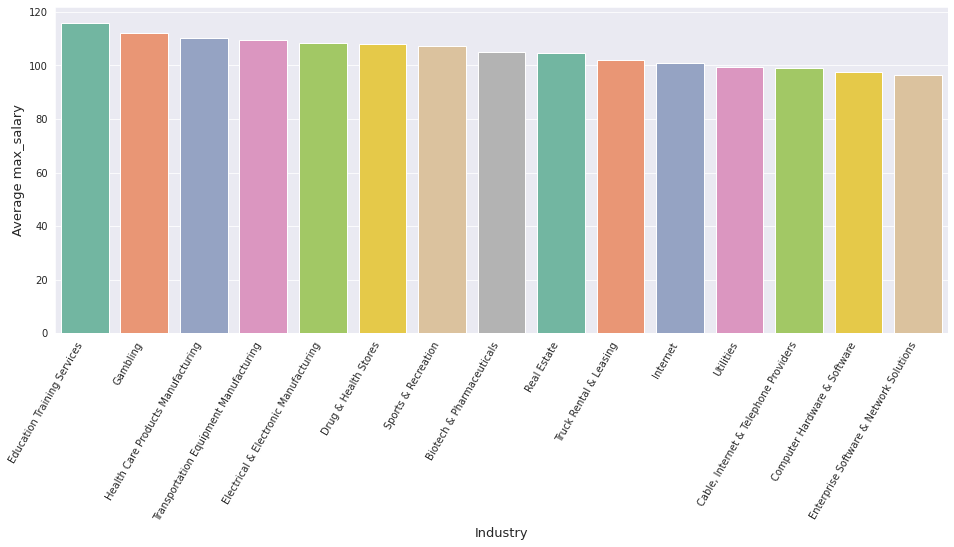

In [ ]:
df = data.groupby(['Industry'])['max_salary'].mean().sort_values(ascending=False).reset_index()
boxplot(df, 'Industry', 'max_salary', 15)

>> ### Top 15 Industries with lowest minimum salary

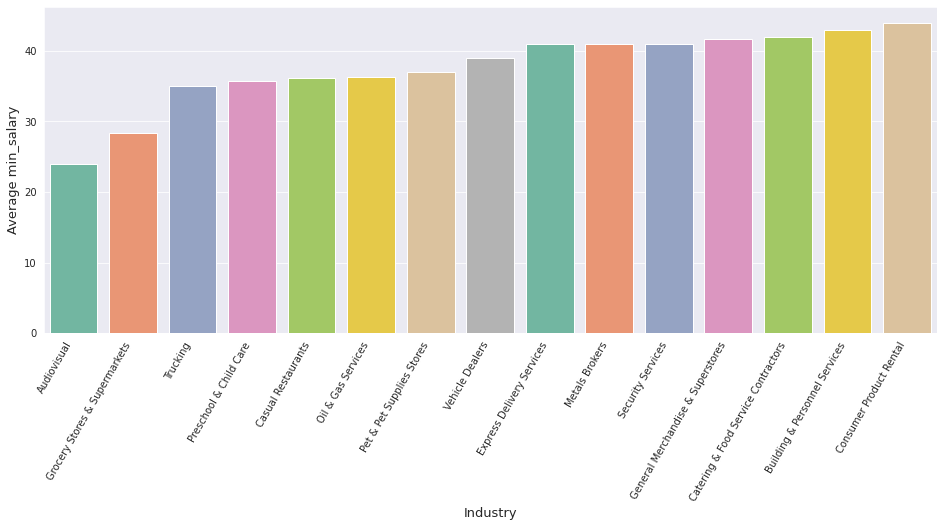

In [ ]:
df = data.groupby(['Industry'])['min_salary'].mean().sort_values(ascending=True).reset_index()
boxplot(df, 'Industry', 'min_salary', 15)

> ## Sector

>> ### Top 15 sectors with maximum average maximim salary

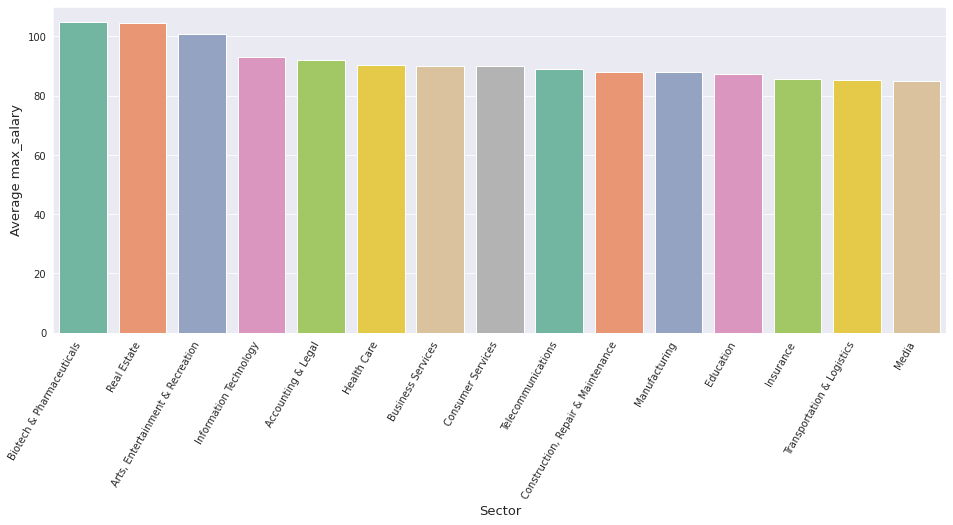

In [ ]:
df = data.groupby(['Sector'])['max_salary'].mean().sort_values(ascending=False).reset_index()
boxplot(df, 'Sector', 'max_salary', 15)

>> ### Top 15 Sector with lowest average minimum salary

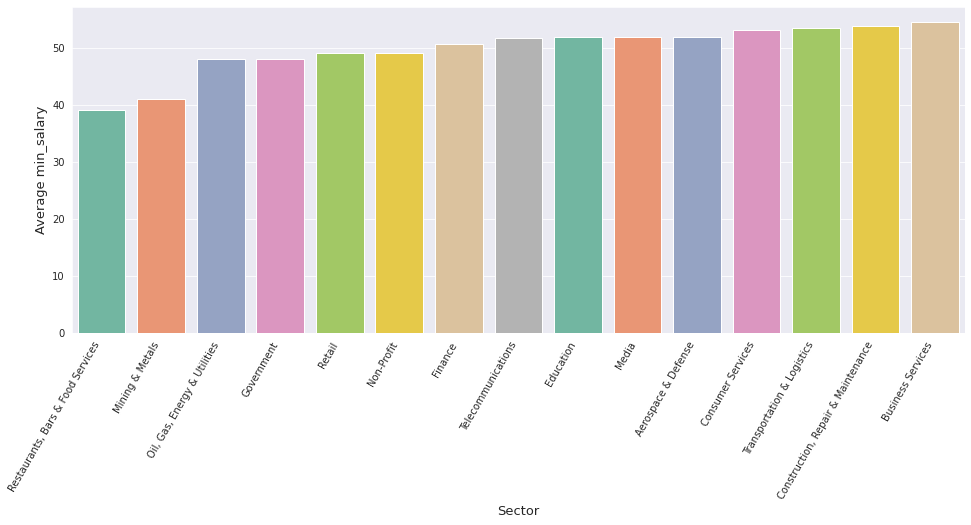

In [ ]:
df = data.groupby(['Sector'])['min_salary'].mean().sort_values(ascending=True).reset_index()
boxplot(df, 'Sector', 'min_salary', 15)